<a href="https://colab.research.google.com/github/ParkEunHyeok/AI_Study/blob/main/NLP/MovRev_word2vec_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install gensim
!pip install konlpy
!pip install gensim

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [3]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7f3078ca7f90>)

In [4]:
train_data = pd.read_table('ratings.txt')
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [5]:
print(len(train_data))

200000


In [6]:
train_data = train_data.dropna(how='any')
print(len(train_data))

199992


In [7]:
# 정규 표현식을 통한 한글 외 문자 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "")
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


In [8]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

okt = Okt()
tokenized_data = []
for sentence in train_data['document']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    tokenized_data.append(temp_X)

리뷰의 최대 길이 : 72
리뷰의 평균 길이 : 10.716703668146726


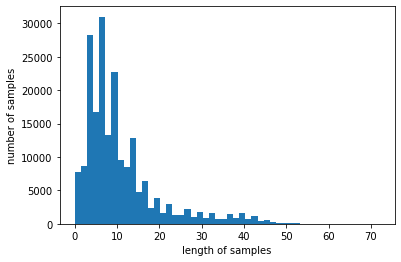

In [9]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [12]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [13]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(16477, 100)

In [23]:
print(model.wv.most_similar("최민식"))
print(model.wv.most_similar("멜로"))

[('안성기', 0.8906874656677246), ('한석규', 0.8749334812164307), ('윤제문', 0.8608090281486511), ('김수현', 0.853966474533081), ('최민수', 0.8531773090362549), ('박중훈', 0.848337709903717), ('유다인', 0.8454146385192871), ('서영희', 0.8441126346588135), ('채민서', 0.8436305522918701), ('스트립', 0.8431341052055359)]
[('로맨스', 0.8954145908355713), ('판타지', 0.8537096977233887), ('호러', 0.8490341901779175), ('코메디', 0.8418333530426025), ('스릴러', 0.8372412919998169), ('로맨틱', 0.8306726217269897), ('무협', 0.8216227293014526), ('코미디', 0.8153150081634521), ('히어로', 0.8043252229690552), ('느와르', 0.7950459122657776)]


In [25]:
from google.colab import files
data = files.upload() # csv 파일 업로드

Saving ko.bin to ko.bin


In [29]:
import gensim
model = gensim.models.Word2Vec.load('ko.bin')

In [36]:
print(model.wv.most_similar("컴퓨터"))
print(model.wv.most_similar("삼성"))

[('하드웨어', 0.7727354764938354), ('소프트웨어', 0.7308895587921143), ('마이크로프로세서', 0.7205492258071899), ('개인용', 0.7154535055160522), ('노트북', 0.7130324244499207), ('계산기', 0.7044994831085205), ('하드디스크', 0.6943572759628296), ('태블릿', 0.6915029287338257), ('그래픽스', 0.6882646083831787), ('프린터', 0.6876466274261475)]
[('롯데', 0.6897560954093933), ('라이온즈', 0.6591787338256836), ('한화', 0.6378117203712463), ('팡스', 0.6269095540046692), ('에버랜드', 0.6023454666137695), ('라이온', 0.6016649603843689), ('윙즈', 0.5847237706184387), ('삼성전자', 0.5846612453460693), ('특검', 0.5804288387298584), ('삼성물산', 0.5801803469657898)]
